In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_cycle = 1000
dis_pi = 10

In [3]:
dataset = np.linspace(0, num_cycle*math.pi, dis_pi*num_cycle)

In [4]:
dataset = np.reshape(dataset, (dis_pi*num_cycle, 1))

In [5]:
sin_dataset = []

In [6]:
for i in dataset:
    sin_dataset.append(math.sin(i))

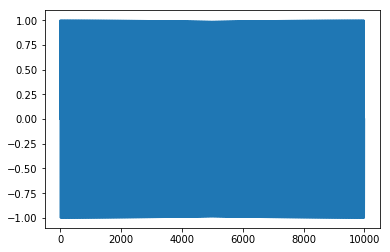

In [7]:
plt.plot(sin_dataset)

In [8]:
train_dataset = sin_dataset[:900]
test_dataset = sin_dataset[900:]

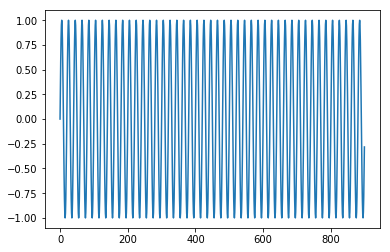

In [9]:
plt.plot(train_dataset)

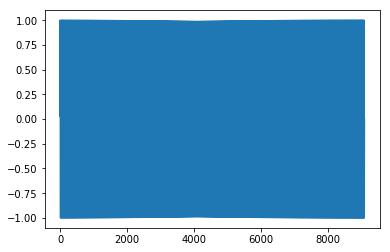

In [10]:
plt.plot(test_dataset)

In [11]:
# define train_ddatast

In [12]:
train_X = []
train_y = []

In [13]:
for i in range(40, len(train_dataset)-30):
    train_X.append(train_dataset[(i-40):i])
    train_y.append(train_dataset[i:(i+30)])

In [14]:
print(np.shape(train_X), np.shape(train_y))

(830, 40) (830, 30)


In [15]:
train_X = np.reshape(train_X, (np.shape(train_X)[0], np.shape(train_X)[1], 1))
train_y = np.reshape(train_y, (np.shape(train_y)[0], np.shape(train_y)[1]))

In [16]:
print(np.shape(train_X), np.shape(train_y))

(830, 40, 1) (830, 30)


In [17]:
# define test_dataset

In [18]:
test_X = []
test_y = []

In [19]:
for i in range(40, len(test_dataset)-30):
    test_X.append(test_dataset[(i-40):i])
    test_y.append(test_dataset[i:(i+30)])

In [20]:
print(np.shape(test_X), np.shape(test_y))

(9030, 40) (9030, 30)


In [21]:
test_X = np.reshape(test_X, (np.shape(test_X)[0], np.shape(test_X)[1], 1))
test_y = np.reshape(test_y, (np.shape(test_y)[0], np.shape(test_y)[1], 1))

In [22]:
print(np.shape(test_X), np.shape(test_y))

(9030, 40, 1) (9030, 30, 1)


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 30))

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
regressor.fit(train_X, train_y, epochs = 10, batch_size = 32)

Epoch 1/10
830/830 [==============================] - 9s 11ms/step - loss: 0.4141
Epoch 2/10
830/830 [==============================] - 5s 6ms/step - loss: 0.2518
Epoch 3/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0757
Epoch 4/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0322
Epoch 5/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0278
Epoch 6/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0249
Epoch 7/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0231
Epoch 8/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0222
Epoch 9/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0209
Epoch 10/10
830/830 [==============================] - 5s 6ms/step - loss: 0.0193


In [29]:
print(np.shape(test_X))
test_x = test_X[-1]
print(test_x)
test_x = np.reshape(test_x, (1, np.shape(test_x)[0], 1))

(9030, 40, 1)
[[ 0.00219933]
 [-0.30695446]
 [-0.58605545]
 [-0.80777787]
 [-0.95041368]
 [-0.99999791]
 [-0.95167597]
 [-0.81017887]
 [-0.58936009]
 [-0.31083919]
 [-0.00188514]
 [ 0.30725347]
 [ 0.58631   ]
 [ 0.80796304]
 [ 0.95051134]
 [ 0.99999851]
 [ 0.95157943]
 [ 0.80999466]
 [ 0.58910623]
 [ 0.31054054]
 [ 0.00157095]
 [-0.30755244]
 [-0.58656449]
 [-0.80814813]
 [-0.95060891]
 [-0.999999  ]
 [-0.9514828 ]
 [-0.80981037]
 [-0.58885232]
 [-0.31024187]
 [-0.00125676]
 [ 0.30785139]
 [ 0.58681893]
 [ 0.80833314]
 [ 0.95070638]
 [ 0.9999994 ]
 [ 0.95138608]
 [ 0.80962599]
 [ 0.58859835]
 [ 0.30994317]]


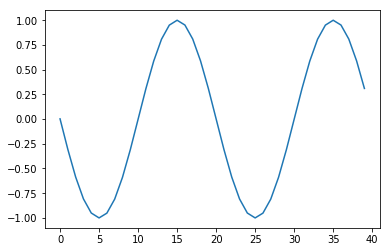

In [32]:
# test_x
test_xx = np.reshape(test_x, (np.shape(test_x)[1], 1))
plt.plot(test_xx)

(1, 30)


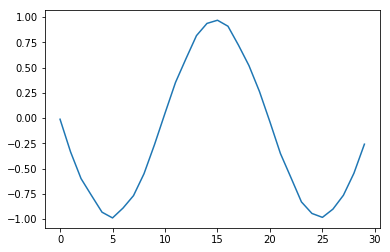

In [33]:
# test_y
predict = regressor.predict(test_x)
print(np.shape(predict))
predict = np.reshape(predict, (np.shape(predict)[1], 1))
plt.plot(predict)